In [4]:
import pandas as pd
from datetime import datetime

## Creating a Reddit API Client with PRAW

In [22]:
import praw

#User Agent Definition
user_agent = "nvda 1.0 by u/Interesting-Thing302"

#Reddit API Client Initialization
reddit=praw.Reddit(
    client_id='-Eii7F5tVZEYTB9_xuwUUA',
    client_secret='lYSjyUDDlGRpRwwG-gaLZ8Fj05BLXA',
    user_agent=user_agent
)

## Extracting Reddit Comments Related OpenAI

In [3]:
#Search Query and Date Range Setup
search_query = "openai"

#Lists to Store Comment Data
start_date=datetime(2023,1,1)
end_date=datetime(2024,6,26)

comments_text=[]
comments_created_time=[]
comments_scores=[]

#Searching and Collecting Comments
for submission in reddit.subreddit('openai').search(search_query, limit=None):
    
    submission.comments.replace_more(limit=None)
    
    for comment in submission.comments.list():
        
        comment_time=datetime.utcfromtimestamp(comment.created_utc)
        
        if start_date<=comment_time<=end_date:
            comments_text.append(comment.body)
            comments_created_time.append(comment_time.strftime('%Y-%m-%d'))
            comments_scores.append(comment.score)

#Creating a Pandas DataFrame
openai_reddit_df=pd.DataFrame({
    'comment':comments_text,
    'created_time':comments_created_time,
    'score':comments_scores
})    

In [ ]:
openai_reddit_df

In [5]:
#Check the dataframe
openai_reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31751 entries, 0 to 31750
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment       31751 non-null  object
 1   created_time  31751 non-null  object
 2   score         31751 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 744.3+ KB


## Sorting Reddit Comments DataFrame by Creation Time

In [6]:
#Change the created time to datetime format
openai_reddit_df['created_time']=pd.to_datetime(openai_reddit_df['created_time'])

In [7]:
#Sortting the data by created time
openai_reddit_df_sorted=openai_reddit_df.sort_values(by='created_time')

In [8]:
#Resetting the Index
openai_reddit_df_sorted.reset_index(drop=True, inplace=True)

In [9]:
openai_reddit_df_sorted

,comment,created_time,score
0,OpenAI is missleading because fools people int...,2023-01-03,1
1,Yeah. Delete your email account there as well....,2023-01-03,1
2,OpenAI is a scam website. Never give them your...,2023-01-03,1
3,"Hmmmm, I got a call from a good buddy about th...",2023-01-04,1
4,"Just remember this is trained on articles, boo...",2023-01-05,1
...,...,...,...
31746,"Yeah, it’s almost like they have a handshake a...",2024-06-25,-11
31747,Absolutely,2024-06-25,3
31748,Vision. It will have real time vision capabil...,2024-06-25,-7
31749,Read the announcement. Sheesh. It got delaye...,2024-06-25,-9


In [10]:
openai_reddit_df_sorted.to_csv("openai_reddit_df.csv", index=False)

In [6]:
openai_comment_df=pd.read_csv("openai_reddit_df.csv")

In [7]:
openai_comment_df

,comment,created_time,score
0,OpenAI is missleading because fools people int...,2023-01-03,1
1,Yeah. Delete your email account there as well....,2023-01-03,1
2,OpenAI is a scam website. Never give them your...,2023-01-03,1
3,"Hmmmm, I got a call from a good buddy about th...",2023-01-04,1
4,"Just remember this is trained on articles, boo...",2023-01-05,1
...,...,...,...
31746,"Yeah, it’s almost like they have a handshake a...",2024-06-25,-11
31747,Absolutely,2024-06-25,3
31748,Vision. It will have real time vision capabil...,2024-06-25,-7
31749,Read the announcement. Sheesh. It got delaye...,2024-06-25,-9


In [8]:
openai_comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31751 entries, 0 to 31750
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment       31750 non-null  object
 1   created_time  31751 non-null  object
 2   score         31751 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 744.3+ KB


In [9]:
openai_comment_df['created_time']=pd.to_datetime(openai_comment_df['created_time'])
openai_comment_df['comment'] = openai_comment_df['comment'].astype(object).fillna('')

In [10]:
openai_comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31751 entries, 0 to 31750
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   comment       31751 non-null  object        
 1   created_time  31751 non-null  datetime64[ns]
 2   score         31751 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 744.3+ KB


# Sentiment Analysis on Reddit Disscussion on OpenAI

In [11]:
from vaderSentiment.vaderSentiment  import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(score):
    if score >= 0.5:
        return 'positive'
    elif score <= -0.5:
        return 'negative'
    else:
        return 'neutral'

#Apply sentiment analysis

openai_comment_df['sentiment']=openai_comment_df['comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

openai_comment_df['sentiment']=openai_comment_df['sentiment'].apply(classify_sentiment)

In [12]:
openai_comment_df

,comment,created_time,score,sentiment
0,OpenAI is missleading because fools people int...,2023-01-03,1,negative
1,Yeah. Delete your email account there as well....,2023-01-03,1,neutral
2,OpenAI is a scam website. Never give them your...,2023-01-03,1,neutral
3,"Hmmmm, I got a call from a good buddy about th...",2023-01-04,1,positive
4,"Just remember this is trained on articles, boo...",2023-01-05,1,positive
...,...,...,...,...
31746,"Yeah, it’s almost like they have a handshake a...",2024-06-25,-11,neutral
31747,Absolutely,2024-06-25,3,neutral
31748,Vision. It will have real time vision capabil...,2024-06-25,-7,positive
31749,Read the announcement. Sheesh. It got delaye...,2024-06-25,-9,neutral


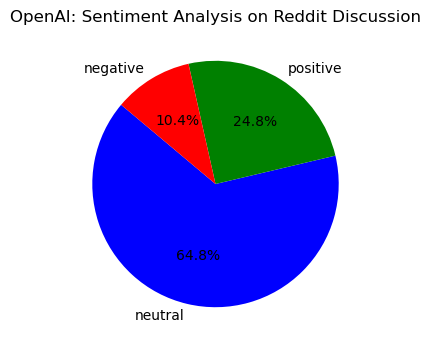

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = openai_comment_df['sentiment'].value_counts()

colors=['green','red','blue']
colors_map={'positive':'green', 'neutral':'blue', 'negative': 'red'}
colors_pie=[colors_map[sentiment] for sentiment in sentiment_counts.index]


# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_pie)
plt.title('OpenAI: Sentiment Analysis on Reddit Discussion')
plt.show()

In [14]:
openai_comment_df['date']=pd.to_datetime(openai_comment_df['created_time'])

In [15]:
openai_comment_df

,comment,created_time,score,sentiment,date
0,OpenAI is missleading because fools people int...,2023-01-03,1,negative,2023-01-03
1,Yeah. Delete your email account there as well....,2023-01-03,1,neutral,2023-01-03
2,OpenAI is a scam website. Never give them your...,2023-01-03,1,neutral,2023-01-03
3,"Hmmmm, I got a call from a good buddy about th...",2023-01-04,1,positive,2023-01-04
4,"Just remember this is trained on articles, boo...",2023-01-05,1,positive,2023-01-05
...,...,...,...,...,...
31746,"Yeah, it’s almost like they have a handshake a...",2024-06-25,-11,neutral,2024-06-25
31747,Absolutely,2024-06-25,3,neutral,2024-06-25
31748,Vision. It will have real time vision capabil...,2024-06-25,-7,positive,2024-06-25
31749,Read the announcement. Sheesh. It got delaye...,2024-06-25,-9,neutral,2024-06-25


## Aggregating Sentiment Scores by Date

In [16]:
# Aggregate sentiment scores by date
openai_sentiment= openai_comment_df.groupby('date').agg(
{
    'score':'sum',
    'sentiment': lambda x: x.value_counts().idxmax()
}).reset_index()

# Rename the date column to match the stock DataFrame
openai_sentiment.rename(columns={'date': 'Date'}, inplace=True)

In [17]:
openai_sentiment

,Date,score,sentiment
0,2023-01-03,3,neutral
1,2023-01-04,1,positive
2,2023-01-05,8,neutral
3,2023-01-06,9,neutral
4,2023-01-07,2,neutral
...,...,...,...
390,2024-06-21,2703,neutral
391,2024-06-22,3357,neutral
392,2024-06-23,92,neutral
393,2024-06-24,2441,neutral


In [18]:
#Save OpenAI sentiment to CSV
openai_sentiment.to_csv("openai_sentiment.csv", index=False)

# Topic Modelling on Reddit Discussion on OpenAI

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

## Preprocessing Reddit Comments Using NLTK

In [20]:
#Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

#Initialize stopwords and stemmer
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()

#Preprocssing function
def preprocess_text(text):
    
    #Tokenization
    tokens=word_tokenize(text.lower())
    
    #Stop-word removal
    filter_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    #Stemming
    stemmed_tokens = [stemmer.stem(word) for word in filter_tokens]
    return ' '.join(stemmed_tokens)

#Apply proprocessing
openai_comment_df['processed_comment']=openai_comment_df['comment'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/sailone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sailone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
openai_comment_df

,comment,created_time,score,sentiment,date,processed_comment
0,OpenAI is missleading because fools people int...,2023-01-03,1,negative,2023-01-03,openai misslead fool peopl beliv open sourc pr...
1,Yeah. Delete your email account there as well....,2023-01-03,1,neutral,2023-01-03,yeah delet email account well hate weaselli be...
2,OpenAI is a scam website. Never give them your...,2023-01-03,1,neutral,2023-01-03,openai scam websit never give number think act...
3,"Hmmmm, I got a call from a good buddy about th...",2023-01-04,1,positive,2023-01-04,hmmmm got call good buddi softwar gave name cl...
4,"Just remember this is trained on articles, boo...",2023-01-05,1,positive,2023-01-05,rememb train articl book data etc crawl articl...
...,...,...,...,...,...,...
31746,"Yeah, it’s almost like they have a handshake a...",2024-06-25,-11,neutral,2024-06-25,yeah almost like handshak agreement biden admi...
31747,Absolutely,2024-06-25,3,neutral,2024-06-25,absolut
31748,Vision. It will have real time vision capabil...,2024-06-25,-7,positive,2024-06-25,vision real time vision capabl talk environ se...
31749,Read the announcement. Sheesh. It got delaye...,2024-06-25,-9,neutral,2024-06-25,read announc sheesh got delay month fulli bake...


In [22]:
# Define date ranges
part_1_start = '2024-01-01'
part_1_end = '2024-06-30'

# Filter data for each part
part_1_df = openai_comment_df[(openai_comment_df['date'] >= part_1_start) & (openai_comment_df['date'] < part_1_end)]

# Reset index for each dataframe if needed
part_1_df = part_1_df.reset_index(drop=True)


## Topic Modeling and Visualization Using LDA

In [23]:
# Import necessary libraries
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import gensim
import gensim.corpora as corpora

/Users/sailone/anaconda3/lib/python3.11/site-packages/botocore/utils.py:15: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
/Users/sailone/anaconda3/lib/python3.11/site-packages/botocore/httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


In [24]:
# Extract the processed comments
documents_1 = part_1_df['processed_comment'].tolist()

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
vectorized_data = vectorizer.fit_transform(documents_1)

# Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components as needed
lda_model.fit(vectorized_data)

# Convert the data to the format that gensim expects
corpus = gensim.matutils.Sparse2Corpus(vectorized_data, documents_columns=False)
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((i, s) for i, s in enumerate(vectorizer.get_feature_names_out())))

# Create the gensim LDA model equivalent
gensim_lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    passes=10,
    random_state=42
)

# Prepare the LDA visualization
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(gensim_lda_model, corpus, id2word)

# Display the LDA visualization
pyLDAvis.display(panel)
